AIM:- 1.	For a given dataset (e.g. iris data set) D of size N×M with N:Number of samples and M: number of features, design a Bayesian classifier/ Support vector machine/ Decision tree  to classify the test data. Divide the data set into training or testing data according to random percentage split. (assume the underlying distribution to Gaussian).

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

In [2]:
# Collecting iris dataset
df = pd.read_csv("..//Iris.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of iris dataset are:-\n", df.head())

First 5 rows of iris dataset are:-
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# Check the dimensions of the dataset (number of rows and columns).
print("Dimension of the dataset: ", df.shape)

Dimension of the dataset:  (150, 5)


In [4]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [5]:
# Finding Unique categories of species column
print("Types of Species: ", df['Species'].unique())

Types of Species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [6]:
# Mapping Categorical column with float64 values
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [7]:
# Features and target variable selection
features = df.drop('Species', axis='columns')
target = df.Species

In [8]:
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [10]:
# Concatenating the Species column after map with features to get updated dataset
features = pd.concat([features,target], axis='columns')
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Checking for NaN values
features.columns[features.isna().any()]

Index([], dtype='object')

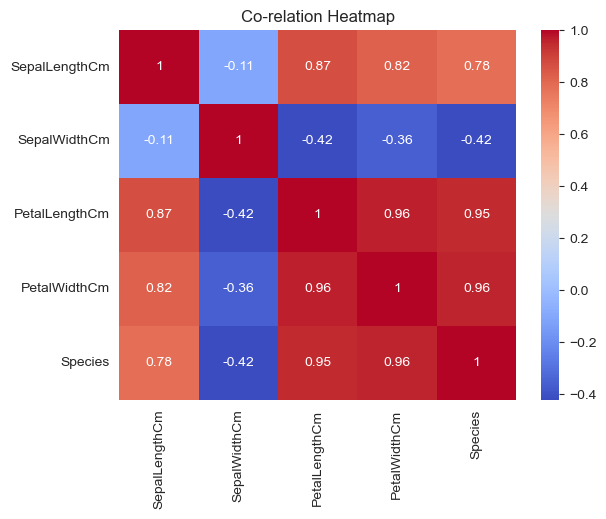

In [12]:
# Plotting the Co-relation between different features
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Co-relation Heatmap")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
# Splitting the dataset(70% training, 30%testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
# Display the size of the training and testing sets
print(f'Training set size: {X_train.shape[0]} samples \nTest set size: {X_test.shape[0]} samples')

Training set size: 105 samples 
Test set size: 45 samples


In [14]:
from sklearn.naive_bayes import GaussianNB
# Adding naive bayes to the model
model = GaussianNB()

In [15]:
# Training the model with .fit
model.fit(X_train, y_train)

GaussianNB()

In [16]:
# Mean accuracy score of the model
model.score(X_test, y_test)

1.0

In [17]:
# Sample of feature_test set
X_test[0:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
120,6.9,3.2,5.7,2.3,2
33,5.5,4.2,1.4,0.2,0
57,4.9,2.4,3.3,1.0,1
102,7.1,3.0,5.9,2.1,2
119,6.0,2.2,5.0,1.5,2
126,6.2,2.8,4.8,1.8,2
69,5.6,2.5,3.9,1.1,1
136,6.3,3.4,5.6,2.4,2
76,6.8,2.8,4.8,1.4,1
75,6.6,3.0,4.4,1.4,1


In [18]:
# Sample of target_test set
y_test[0:10]

120    2
33     0
57     1
102    2
119    2
126    2
69     1
136    2
76     1
75     1
Name: Species, dtype: int64

In [19]:
# Making prediction on the train model through feature_test set
y_predict = model.predict(X_test)
y_predict[0:10]

array([2, 0, 1, 2, 2, 2, 1, 2, 1, 1], dtype=int64)

In [20]:
# Probability of the prediction
y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [21]:
from sklearn.model_selection import cross_val_score
# Calculate the score using cross validation
cross_val_score(GaussianNB(), X_train, y_train, cv=5)

array([1., 1., 1., 1., 1.])

In [22]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix is:\n", conf_matrix)

Confusion Matrix is:
 [[12  0  0]
 [ 0 16  0]
 [ 0  0 17]]


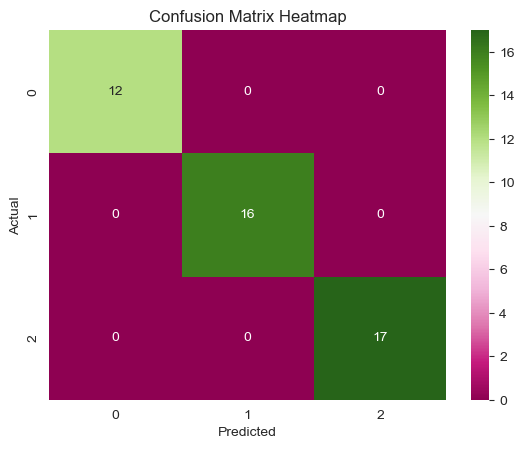

In [23]:
# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index=np.unique(y_test))
# Add title and labels
plt.title('Confusion Matrix Heatmap')
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, annot=True, cmap='PiYG')
plt.show()

C:\Users\shank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


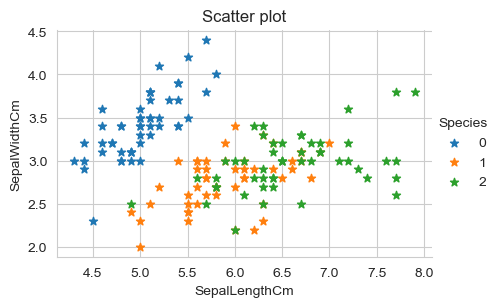

In [24]:
# Visualizing the relationship between two numerical columns with parameter Species to color datapoints uniquely.
sns.FacetGrid(df, hue="Species", aspect=1.5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm", marker='*').add_legend()
plt.title('Scatter plot')
plt.show()


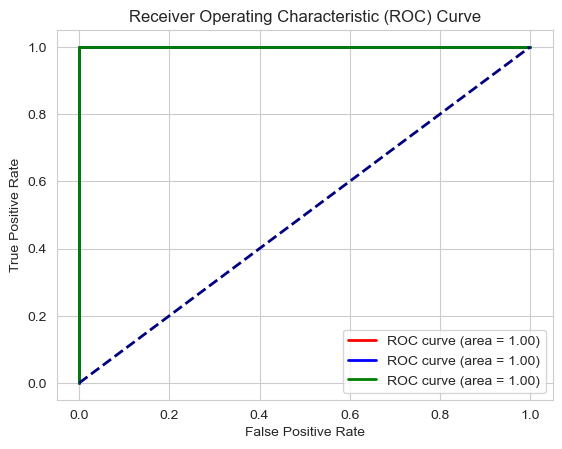

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['red', 'blue', 'green']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()